In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.image as mpimg
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/SGRNJ06/randd/USER/zhouyiqi/work/analysis/space/dataset24_1')

In [3]:
matrix_dir = Path("raw")  # 表达矩阵目录
spatial_dir = Path("spatial")                    # spatial 文件夹
output_file = "dataset1-bc24-spatial.h5ad" 

In [38]:
adata = sc.read_10x_mtx(matrix_dir, var_names='gene_symbols', make_unique=True)

In [5]:
adata.obs

""
AAGAGATC_AAGAGATC
AATCCGTC_AAGAGATC
ACATTGGC_AAGAGATC
ACCTCCAA_AAGAGATC
AGCACCTC_AAGAGATC
...
GTACGCAA_TCTTCACA
GTGTTCTA_TCTTCACA
TAGGATGA_TCTTCACA
TCCGTCTA_TCTTCACA


In [39]:
pos_file = spatial_dir / "tissue_positions_list.csv"
positions = pd.read_csv(pos_file, header=None)
positions.columns = ["barcode", "in_tissue", "array_row", "array_col", "pxl_col_in_fullres", "pxl_row_in_fullres"]

# 保证 barcode 顺序和表达矩阵一致
positions = positions.set_index("barcode").loc[adata.obs_names]

# 保存坐标到 adata
adata.obs = pd.concat([adata.obs, positions], axis=1)
adata.obsm["spatial"] = positions[["pxl_col_in_fullres", "pxl_row_in_fullres"]].to_numpy()

In [52]:
sf_file = spatial_dir / "scalefactors_json.json"

with open(sf_file, 'r') as f:
    scalefactors = json.load(f)

hires = mpimg.imread(spatial_dir / "tissue_hires_image.png")
hires = np.stack([hires]*3, axis=-1) 
lowres = mpimg.imread(spatial_dir / "tissue_lowres_image.png")
lowres = np.stack([lowres]*3, axis=-1) 
adata.uns['spatial'] = {
    "sample1": {
        "images": {"hires": hires, "lowres": lowres},
        "scalefactors": scalefactors
    }
}

In [53]:
print(hires.shape)

(2000, 2000, 3)


In [8]:
adata.obs

,in_tissue,array_row,array_col,pxl_col_in_fullres,pxl_row_in_fullres
AAGAGATC_AAGAGATC,1,8,15,1293,1702
AATCCGTC_AAGAGATC,1,23,15,2368,1690
ACATTGGC_AAGAGATC,1,6,15,1149,1704
ACCTCCAA_AAGAGATC,1,21,15,2225,1692
AGCACCTC_AAGAGATC,1,20,15,2153,1693
...,...,...,...,...,...
GTACGCAA_TCTTCACA,1,5,7,1075,1150
GTGTTCTA_TCTTCACA,1,22,7,2294,1136
TAGGATGA_TCTTCACA,1,0,7,716,1154
TCCGTCTA_TCTTCACA,1,3,7,932,1152


In [41]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

<AxesSubplot:xlabel='n_genes_by_counts', ylabel='Count'>

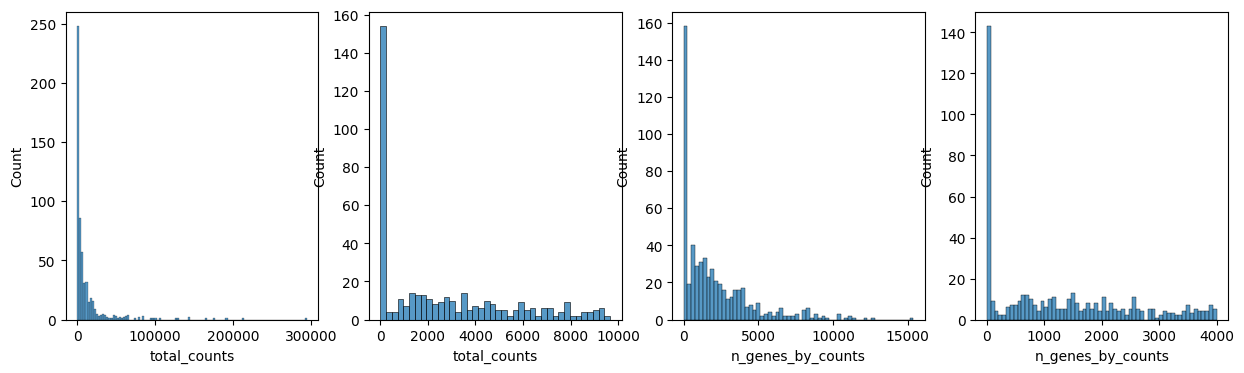

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [27]:
adata.obs

,in_tissue,array_row,array_col,pxl_col_in_fullres,pxl_row_in_fullres,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,zero_total
AAGAGATC_AAGAGATC,1,8,15,1293,1702,366,5.905362,861.0,6.759255,63.298490,69.105691,80.720093,100.000000,140.0,4.948760,16.260162,False
AATCCGTC_AAGAGATC,1,23,15,2368,1690,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,True
ACATTGGC_AAGAGATC,1,6,15,1149,1704,410,6.018593,819.0,6.709304,54.456654,62.148962,74.358974,100.000000,63.0,4.158883,7.692308,False
ACCTCCAA_AAGAGATC,1,21,15,2225,1692,1,0.693147,1.0,0.693147,100.000000,100.000000,100.000000,100.000000,0.0,0.000000,0.000000,False
AGCACCTC_AAGAGATC,1,20,15,2153,1693,8,2.197225,8.0,2.197225,100.000000,100.000000,100.000000,100.000000,0.0,0.000000,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTACGCAA_TCTTCACA,1,5,7,1075,1150,881,6.782192,2242.0,7.715569,57.359500,62.533452,69.625335,83.006244,183.0,5.214936,8.162354,False
GTGTTCTA_TCTTCACA,1,22,7,2294,1136,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,True
TAGGATGA_TCTTCACA,1,0,7,716,1154,4236,8.351611,17580.0,9.774574,51.296928,55.557452,60.756542,69.470990,1360.0,7.215975,7.736064,False
TCCGTCTA_TCTTCACA,1,3,7,932,1152,614,6.421622,1362.0,7.217443,52.716593,60.572687,69.603524,91.629956,80.0,4.394449,5.873715,False


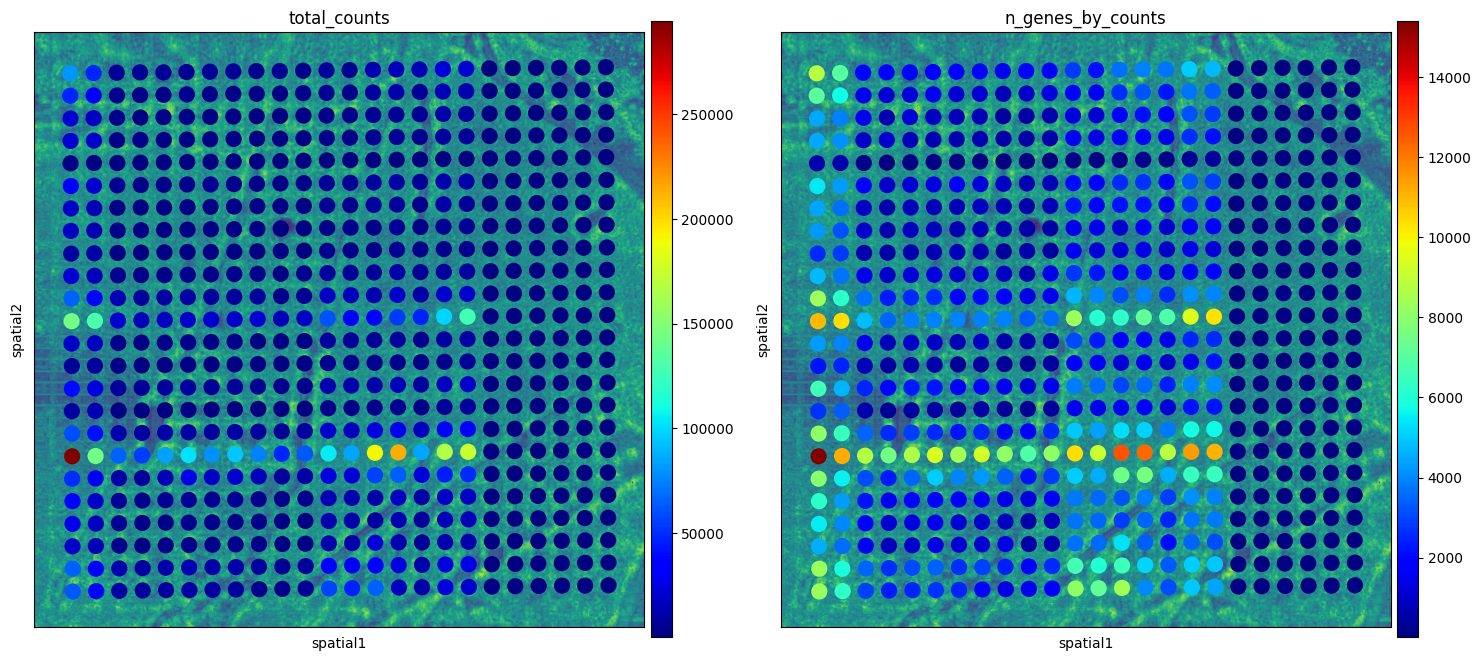

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"], color_map="jet")

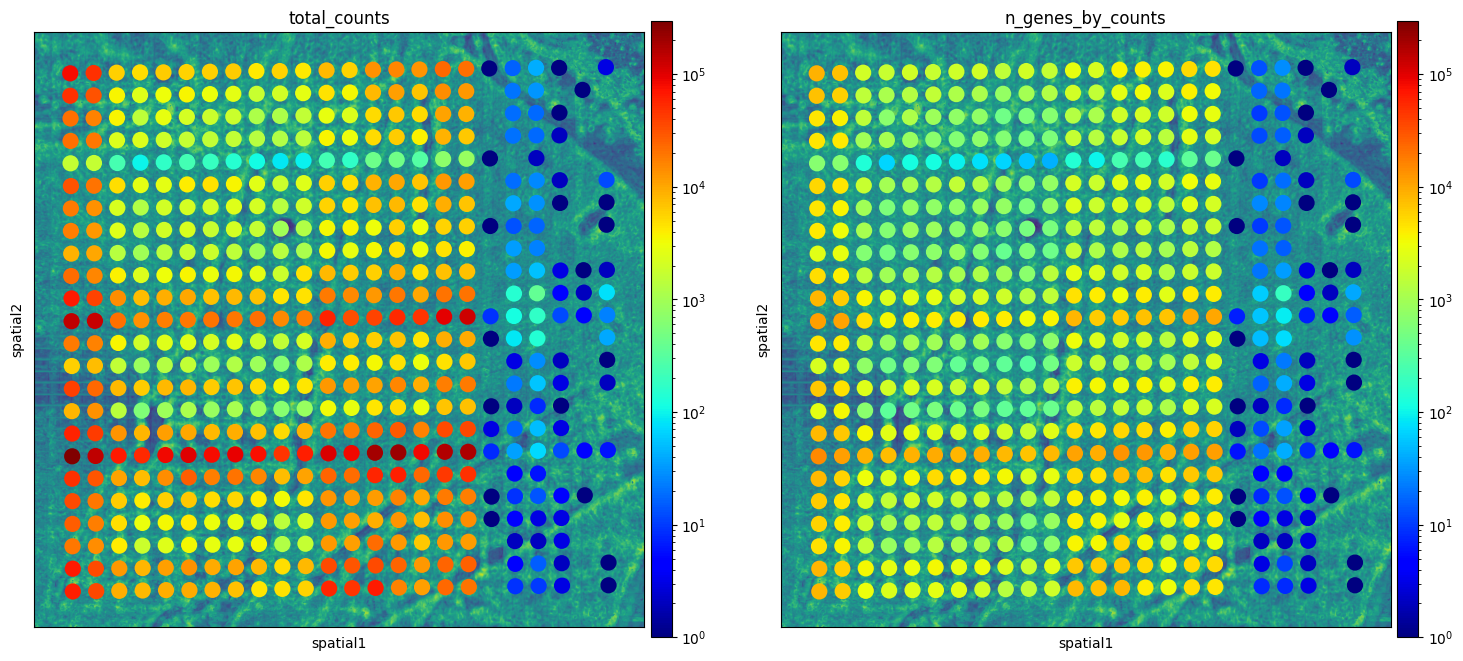

In [24]:
import matplotlib.colors as colors
sc.pl.spatial(
    adata,
    img_key="hires",
    color=["total_counts", "n_genes_by_counts"],
    color_map="jet",
    norm=colors.LogNorm(vmin=1)  # 注意 vmin>0
)

In [22]:
adata.obs

,in_tissue,array_row,array_col,pxl_col_in_fullres,pxl_row_in_fullres,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,zero_total
AAGAGATC_AAGAGATC,1,8,15,1293,1702,366,5.905362,861.0,6.759255,63.298490,69.105691,80.720093,100.000000,0.0,0.0,0.0,False
AATCCGTC_AAGAGATC,1,23,15,2368,1690,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,True
ACATTGGC_AAGAGATC,1,6,15,1149,1704,410,6.018593,819.0,6.709304,54.456654,62.148962,74.358974,100.000000,0.0,0.0,0.0,False
ACCTCCAA_AAGAGATC,1,21,15,2225,1692,1,0.693147,1.0,0.693147,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,False
AGCACCTC_AAGAGATC,1,20,15,2153,1693,8,2.197225,8.0,2.197225,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTACGCAA_TCTTCACA,1,5,7,1075,1150,881,6.782192,2242.0,7.715569,57.359500,62.533452,69.625335,83.006244,0.0,0.0,0.0,False
GTGTTCTA_TCTTCACA,1,22,7,2294,1136,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,True
TAGGATGA_TCTTCACA,1,0,7,716,1154,4236,8.351611,17580.0,9.774574,51.296928,55.557452,60.756542,69.470990,0.0,0.0,0.0,False
TCCGTCTA_TCTTCACA,1,3,7,932,1152,614,6.421622,1362.0,7.217443,52.716593,60.572687,69.603524,91.629956,0.0,0.0,0.0,False


In [42]:
sc.pp.filter_cells(adata, min_counts=100)

In [43]:
adata.obs['n_genes_by_counts'].describe()

count      435.000000
mean      2820.549425
std       2498.088703
min         56.000000
25%       1067.000000
50%       2041.000000
75%       3779.500000
max      15391.000000
Name: n_genes_by_counts, dtype: float64

In [44]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

/SGRNJ/Public/Software/conda_env/dev/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [46]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(
    adata,  resolution=0.8)

/SGRNJ/Public/Software/conda_env/dev/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


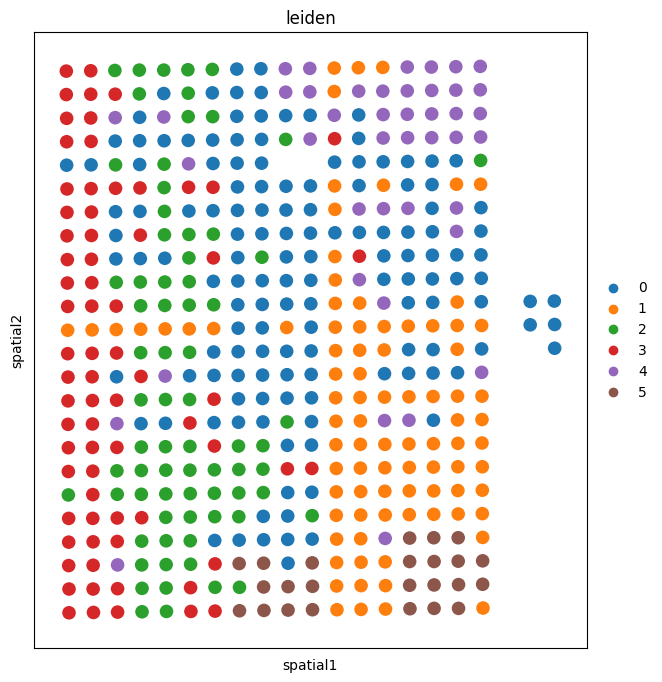

In [47]:
sc.pl.spatial(adata, color='leiden', spot_size=40, img_key=None)

/SGRNJ/Public/Software/conda_env/dev/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


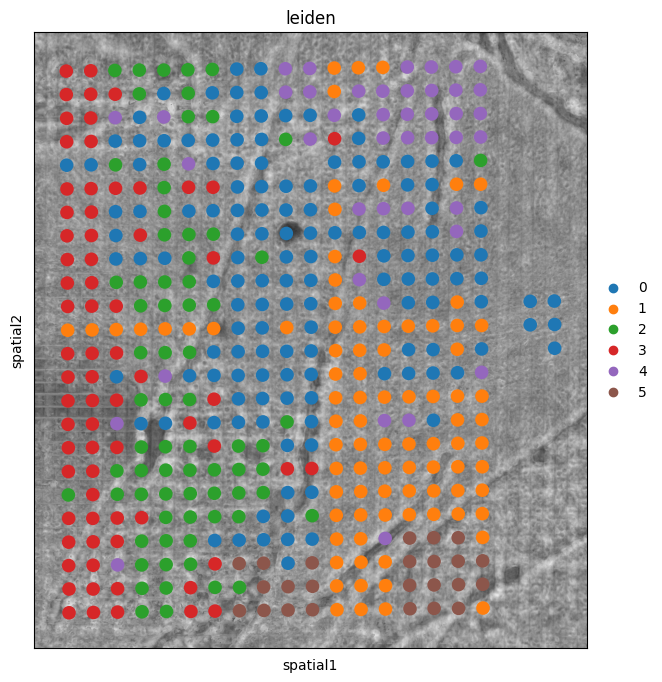

In [54]:
sc.pl.spatial(adata, color='leiden', spot_size=40, img_key='hires')

/SGRNJ/Public/Software/conda_env/dev/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


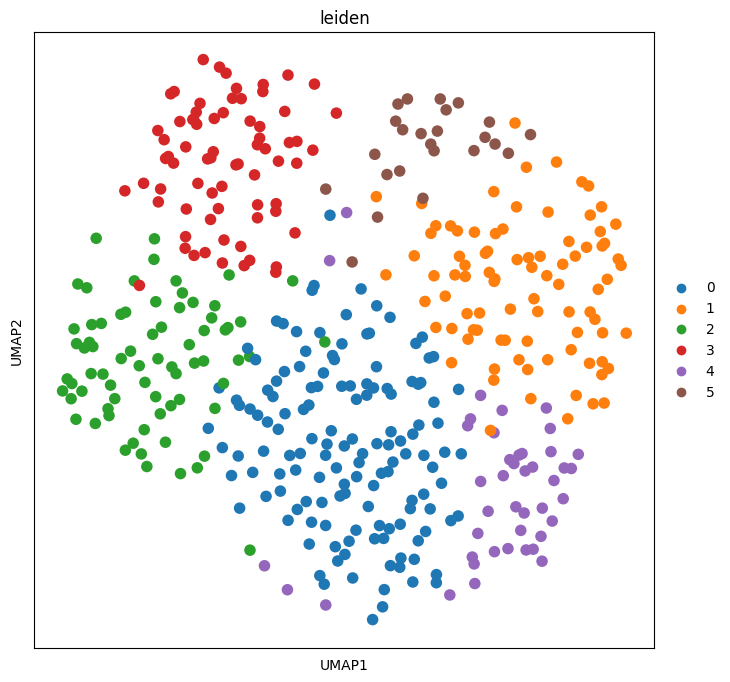

In [49]:
sc.pl.umap(adata, color='leiden')